# List 2

## Statistics Refresher


### Knowledge & Skills:
- pmf
- mean
- variance
- gaussian
- binomial
- multinomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy, scipy.stats
from scipy.stats import multinomial

** Exercise 1 **
======
**Visualize (pmf, mean, variance) of pseudo random number generators (parametrized) that follows distributions:**
- Single gaussian 
- Two combined gaussian distributions 
- N combined gaussian distributions 

In [2]:
numbers = 1000
numbersOfBins = 100
muOne, sigmaOne = 0, 1      # Parameters: Mean and Standard Deviation of Gaussian Pseudo Random Generator One
gaussianOne = np.random.normal(muOne, sigmaOne, numbers)

muTwo, sigmaTwo = 7, 1      # Parameters: Mean and Standard Deviation of Gaussian Pseudo Random Generator Two
gaussianTwo = np.random.normal(muTwo, sigmaTwo, numbers)

muThree, sigmaThree = -4, 1 # Parameters: Mean and Standard Deviation of Gaussian Pseudo Random Generator Three
gaussianThree = np.random.normal(muThree, sigmaThree, numbers)

In [3]:
mergedGaussian = []
mergedGaussian.extend(gaussianOne)
mergedGaussian.extend(gaussianTwo)
mergedGaussian.extend(gaussianThree)

Mean = 1.01976472472
Variance = 24.9453728386


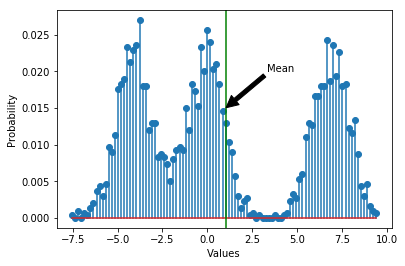

In [4]:
count, bins = np.histogram(mergedGaussian, numbersOfBins)
probability = count / sum(count)
 
# Three types of presenting data (pmf) --- Probabiliy mass function
# -------------------------------------------
# plt.bar(bins[:-1], probability, width=(max(bins) - min(bins))/len(bins), color="blue", alpha=0.5)
# plt.plot(bins[:-1], probability, 'ro-', color='g')
plt.stem(bins[:-1], probability)                

# Count mean and variance
mean = np.mean(bins)
variance = np.var(bins)

print("Mean = " + str(mean))                     # Średnia
print("Variance = " + str(variance))             # Wariancja
plt.axvline(x=mean, color="green")

# Prepare axes and plot figure with options
axes = plt.gca()
plt.ylabel('Probability')
plt.xlabel('Values')
plt.annotate('Mean', xy=(mean, 0.015), xytext=(mean+2.3, 0.02), arrowprops=dict(facecolor='black', shrink=0.01))
plt.show()

** Exercise 2 **
======
Student applied for 9 faculties, acceptance chance for each faculty was 0.01. Unfortunately student was not accepted to any. What is the probability of that situation? Write a function that will solve that problem (parametrized), use exact method and binomials based solution with parameterized number of trials (binomial).

** Datas and parameters **
----------

In [5]:
n = 9                                 # Number of trials
k = range(0, n+1)                     # Number of successes - Student not accepted to k faculty 
PA = 0.99                             # Non Accepted change for each faculty -> P(A)
q = 1 - PA                            # Value of q

** Option 1 **
----------
Using built-in function (binomials based solution with parameterized number of trials (binomial)).

Probability that student was not accepted to any faculty = 0.913517247484


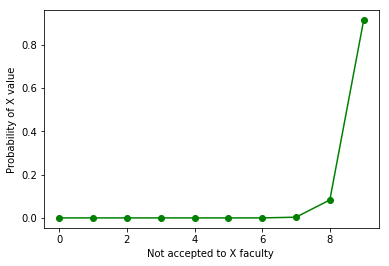

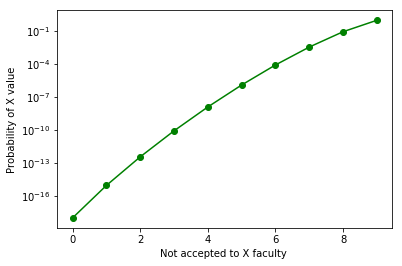

In [6]:
print("Probability that student was not accepted to any faculty = " + str(scipy.stats.binom.pmf(9, n, PA)))

pmf = scipy.stats.binom.pmf(k, n, PA)

# Show result on normal diagram
plt.ylabel('Probability of X value')
plt.xlabel('Not accepted to X faculty ')
plt.plot(k, pmf, 'ro-', color='g')
plt.show()

# Show result on logarithmic diagram
plt.ylabel('Probability of X value')
plt.xlabel('Not accepted to X faculty ')
plt.semilogy(k, pmf, 'ro-', color='g')
plt.show()

** Option 2 **
----------
Using exact method.

Probability that student was not accepted to any faculty = 0.9135172474836408


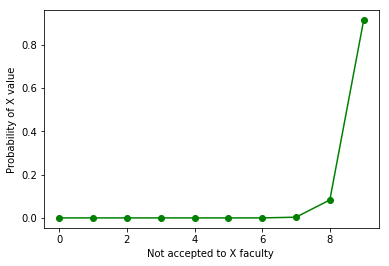

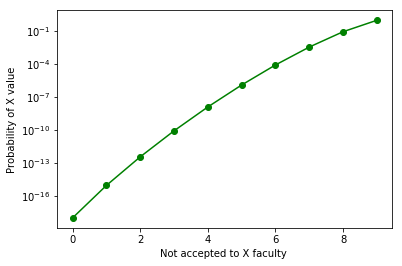

In [7]:
# Newton function
def Newton(n, k):
    Wynik = 1
    for i in range( 1, k+1 ):
        Wynik = Wynik * ( n - i + 1 ) / i
    return Wynik


x = 9        # Probability that student was not accepted to X faculty
PnA = []     # Array for result of probability

print("Probability that student was not accepted to any faculty = " + str(Newton(n, x) * PA**x * q**(n-x)))

for x in range(0, n+1):
    PnA.append(Newton(n, x) * PA**x * q**(n-x))

# Show result on normal diagram
plt.ylabel('Probability of X value')
plt.xlabel('Not accepted to X faculty ')
plt.plot(k, PnA, 'ro-', color='g')
plt.show()

# Show result on logarithmic diagram
plt.ylabel('Probability of X value')
plt.xlabel('Not accepted to X faculty ')
plt.semilogy(k, PnA, 'ro-', color='g')
plt.show()

** Exercise 3 **
======
Solve previous task taking into account that acceptance chance for each faculty was different  (multinomial)

Option 1
-----------
Solution using multinomial function - *Wrong example!*

In [8]:
# Datas and parameters
n = 9                                                         # Number of faculties
PA = [0.01, 0.3, 0.1, 0.05, 0.2, 0.04, 0.1, 0.16, 0.04]       # Non Accepted change for each faculty
k = [1, 1, 1, 1, 1, 1, 1, 1, 1]                               # Number of successes - Not accepted to k faculty, 
                                                              # 1 - not accepted for faculty number X
                                                              # 0 - accepted for faculty number X
    
multinom = scipy.stats.multinomial(n, PA)
pmf = multinom.pmf(k)
print("Probability that student was not accepted to any faculty = " + str(pmf))

Probability that student was not accepted to any faculty = 2.7869184e-05


Option 2
----------
Solution with using poisson binomial distribution

In [9]:
# Datas and parameters
n = 9                                                         # Number of faculties
PA = [0.01, 0.3, 0.1, 0.05, 0.2, 0.04, 0.1, 0.16, 0.04]       
pmf = 1
# For k = 0 
for x in range(0, n):
    pmf = pmf*(1-PA[x])
    
print("Probability that student was not accepted to any faculty = " + str(pmf))

Probability that student was not accepted to any faculty = 0.3302581911551999
